In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#Imported the required libraries

In [125]:
df=pd.read_csv("avocado.csv")
#Loaded the data

#### Exploratory Data Analysis:

In [126]:
df = df.drop('Unnamed: 0', axis=1)
# Dropping Unnamed column

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Dropped the 'Unnamed: 0' column because it was just index.

In [127]:
df.shape
# Checking the shape of the dataset

(18249, 13)

- The dataset content contains 18249 rows and 13 columns.
- The target column is 'AveragePrice'.

In [128]:
df.columns
# Checking for the columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [129]:
df = df.rename(columns={'4046':'PLU_4046', '4225':'PLU_4225', '4770':'PLU_4770'})

df.head()
# Displlaying the columns '4046', '4225', and '4770' to 'PLU_4046', 'PLU_4225', and 'PLU_4770' respectively.

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [130]:
df.dtypes
# Checking the data type of the dataset

Date             object
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- Out of total 13 columns, 9 columns are of float datatype, 1 is of integer datatype and 3 are of object datatype.

In [131]:
df.isnull().sum()
# Checking for the missing values in the dataset

Date            0
AveragePrice    0
Total Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There is no missing values in the dataset.

In [132]:
df.info()
# Checked the Non-Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


      - There is no null values in the dataset.
      - The target column 'AveragePrice' is of float datatype.

Performing feature enginerring on the date column to get the day and month. We're not extracting the year since it is already there in the dataset.

In [133]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [134]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


We can see that two new coulmns are added in the dataset.

In [135]:
df = df.drop(['Date'], axis = 1)
df.head()
# Dropping 'Date' column from the dataset Becuase we've already splitted it into year, month and day.

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [136]:
df.groupby('year')['AveragePrice'].mean()
# Checked the Average price of the avacado year-wise.

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Average price of the avacado was highest in the year 2017 and lowest in the year 2016.

#### Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

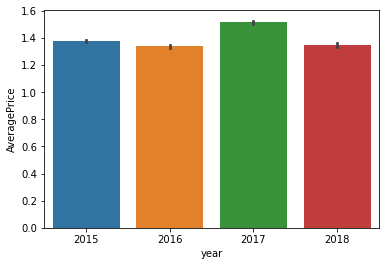

In [137]:
# Plotting bar garph to show the distribution of year-wise average price.
sns.barplot(x='year',y='AveragePrice', data=df)

In the year 2017 the price of the Avacado was highest.In the year 2015 the price was second highest.In the 2016 the price of the Avacado was lowest.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

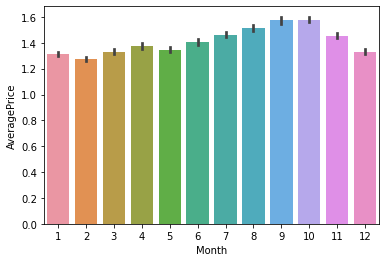

In [138]:
sns.barplot(x='Month',y='AveragePrice', data=df)
# Plotting graph to show the Average price distribution month wise.

9th and 10th month have the maximum prices be due to high demand in the month of 9th and 10th. This shows the fruit Avocado is in demand always.

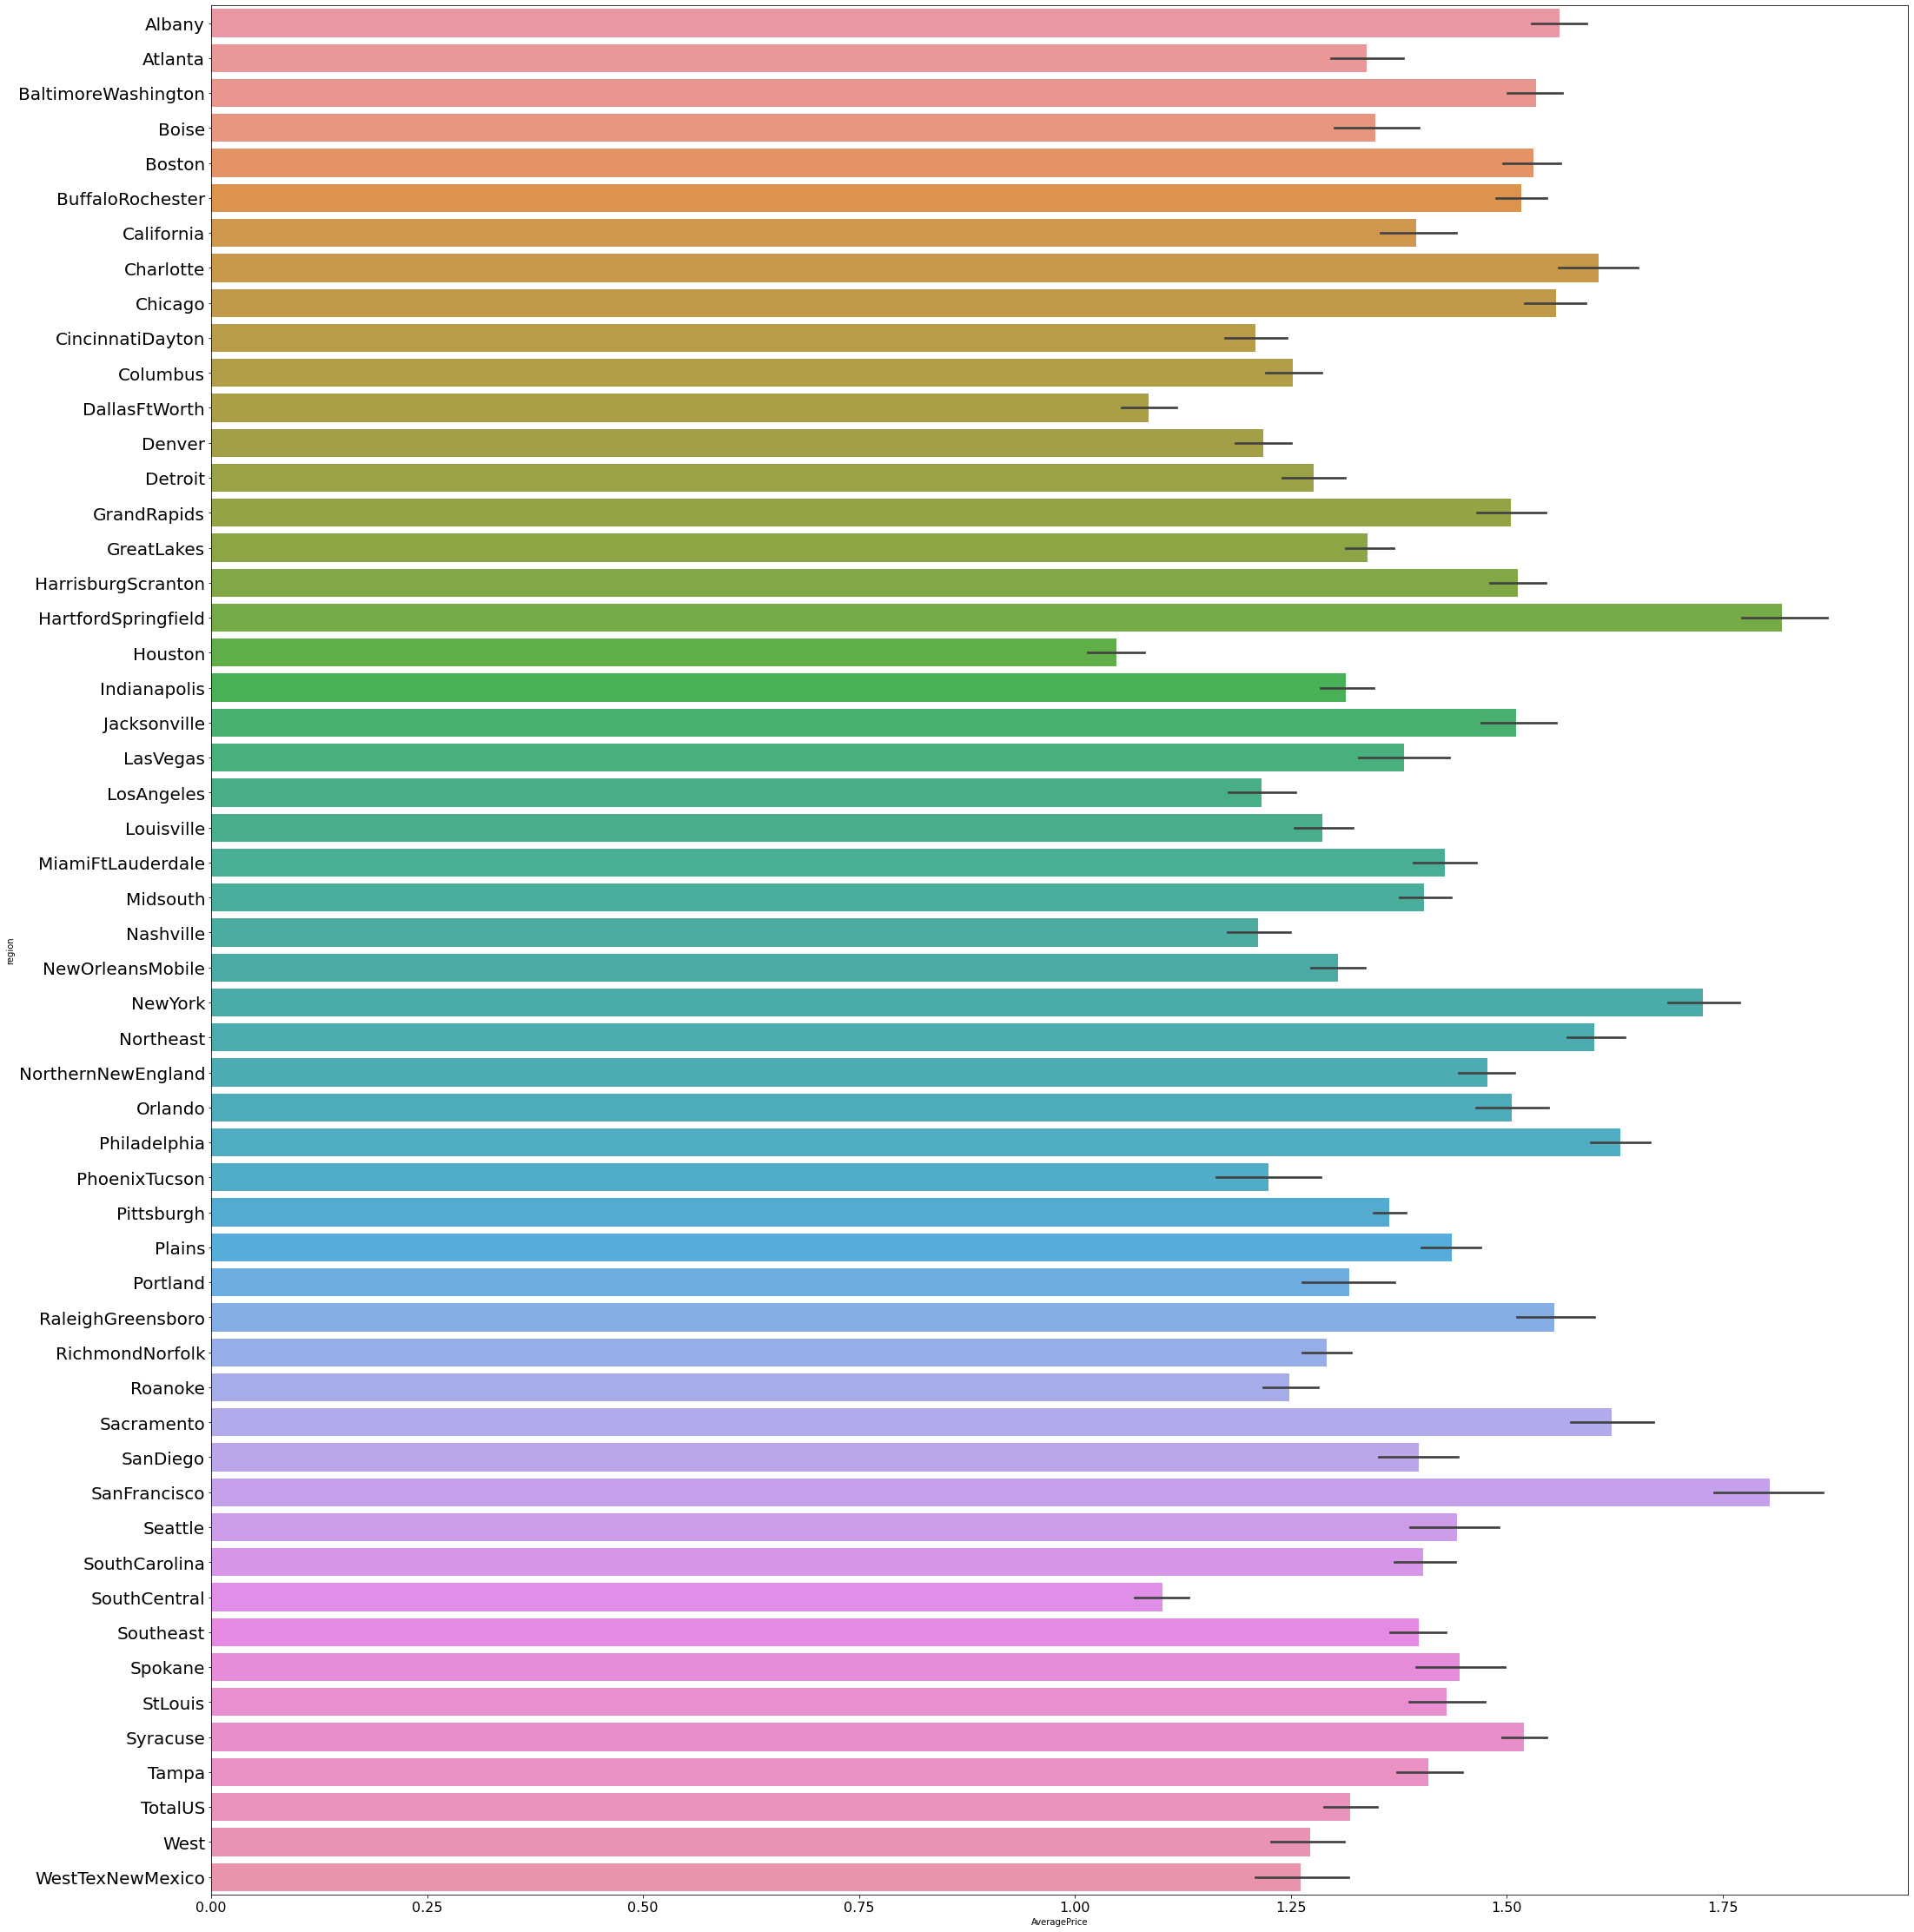

In [139]:
plt.figure(figsize=[35,40])
sns.barplot(x='AveragePrice', y='region', data = df, orient='h')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.show()
# Plotting graph to show Average Price distribution region wise.

graph shows that the average price of Avocado is highest from the region 'Hartford–Springfield' and lowest in the region 'Houston'.

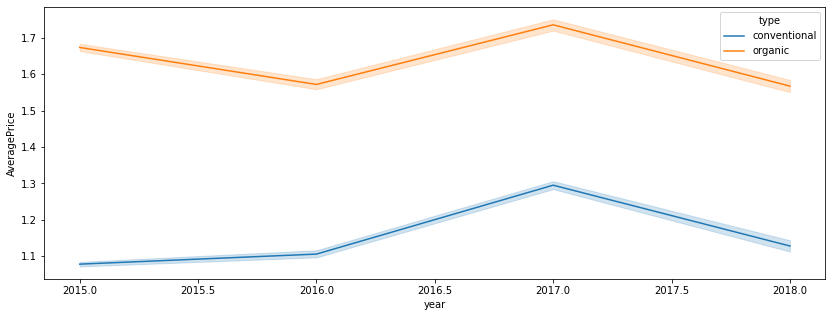

In [140]:
plt.figure(figsize=[14,5])
sns.lineplot(x='year',y='AveragePrice', hue='type', data=df)
plt.show()
# Plotting graph to show the type-wise average price distribution of Avocado

- Price of organic avocado is higher than convetional.

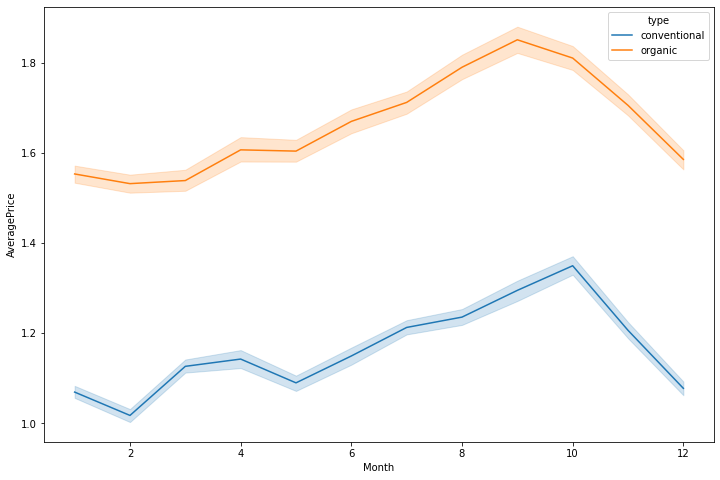

In [141]:
plt.figure(figsize=[12,8])
sns.lineplot(x='Month',y='AveragePrice', hue='type', data=df)
plt.show()
# Plotting graph to show the type-wise average price distribution of Avocado

There is continuous increase in the average price of the Avocado from the May month for both the types. For organic avacado the peak value of the average price is attended in the month of 9th and for the conventional type it is in the month of 10th.
The average price is continuously increasing after the May month till 10th month for the convetional type Avocado.
The average price is continuously increasing after the May month till 9th month for the organic type Avocado.

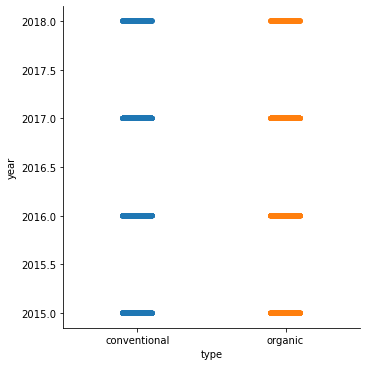

In [142]:
sns.catplot(x="type", y="year",data=df)

We can see there is almost equal sales for both types of avacado from 2015 to 2018.

In [143]:
# Checking for the data description
df.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


<AxesSubplot:>

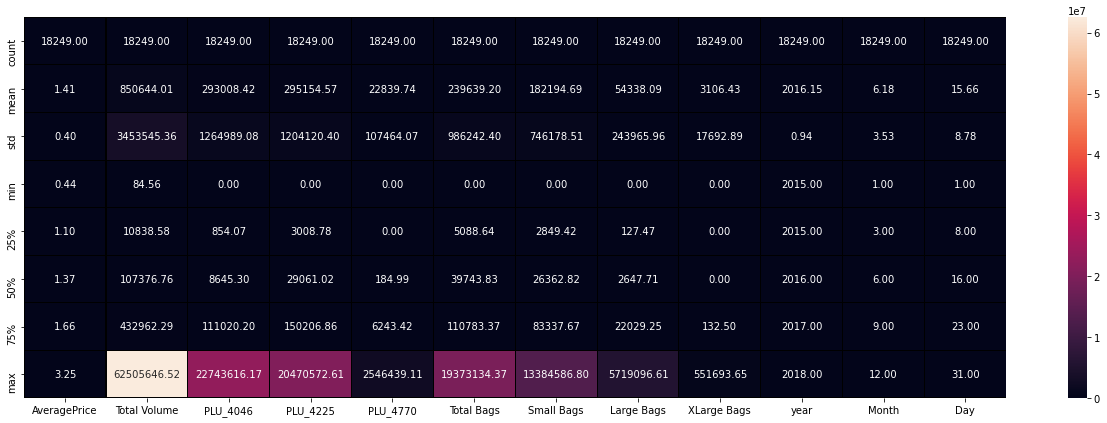

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Correlatoion of the column with the target columns:

In [145]:
df.corr()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

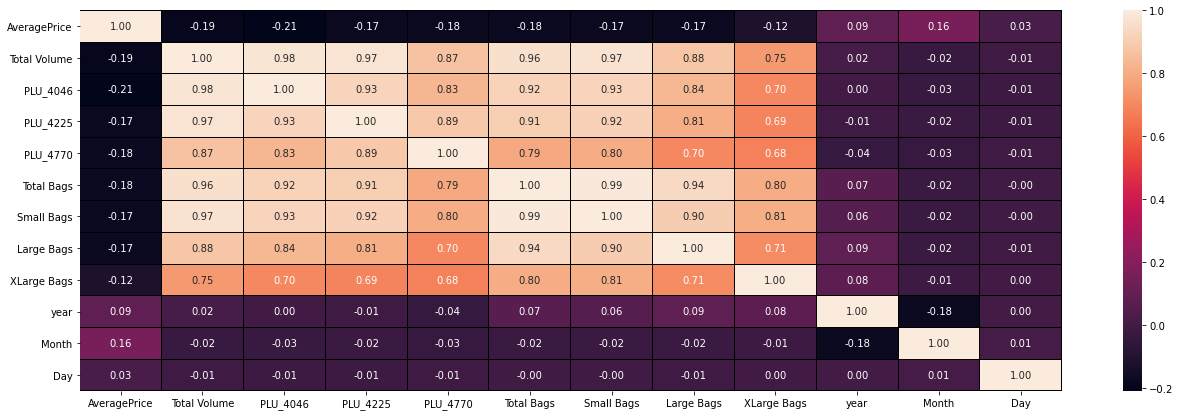

In [146]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

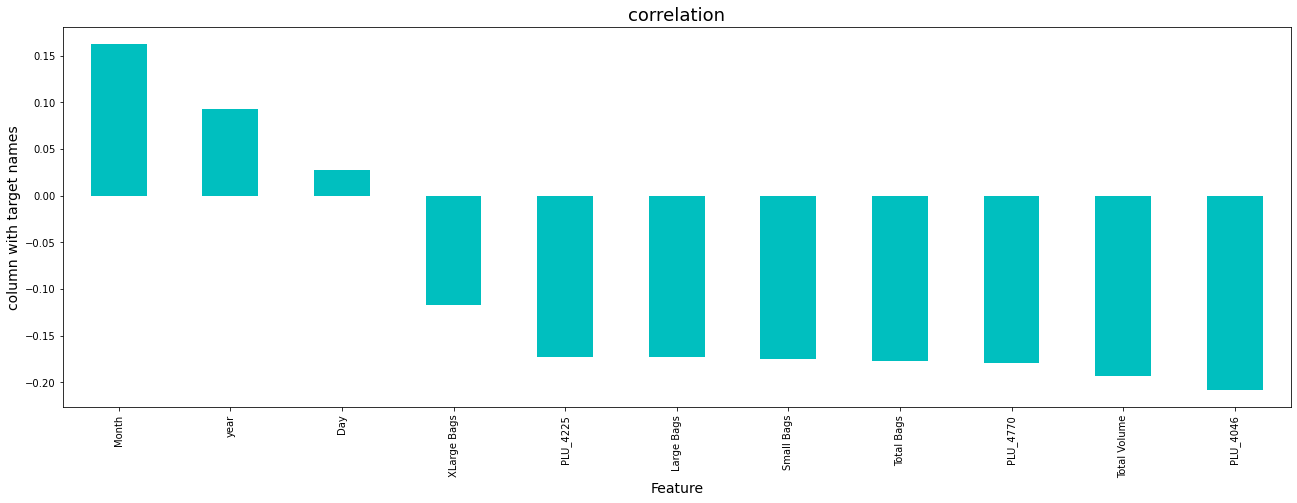

In [147]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [148]:
corr_matrix = df.corr()
corr_matrix['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
PLU_4225       -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
PLU_4770       -0.179446
Total Volume   -0.192752
PLU_4046       -0.208317
Name: AveragePrice, dtype: float64

#### LabelEncoding:

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'].drop_duplicates())
le.classes_
df['type'] = le.transform(df['type'])
# LabelEncoder on 'type' column

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['region'])
le.classes_
df['region'] = le.transform(df['region'])
# LabelEncoder on 'region' column

In [151]:
df.head()
# Checking the head of the dataset

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [152]:
df.dtypes
#Checking the data types of the columns again

AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

- We can see that the columns having the categorical data is converted to numerical values.

#### Checking for the Outliers 

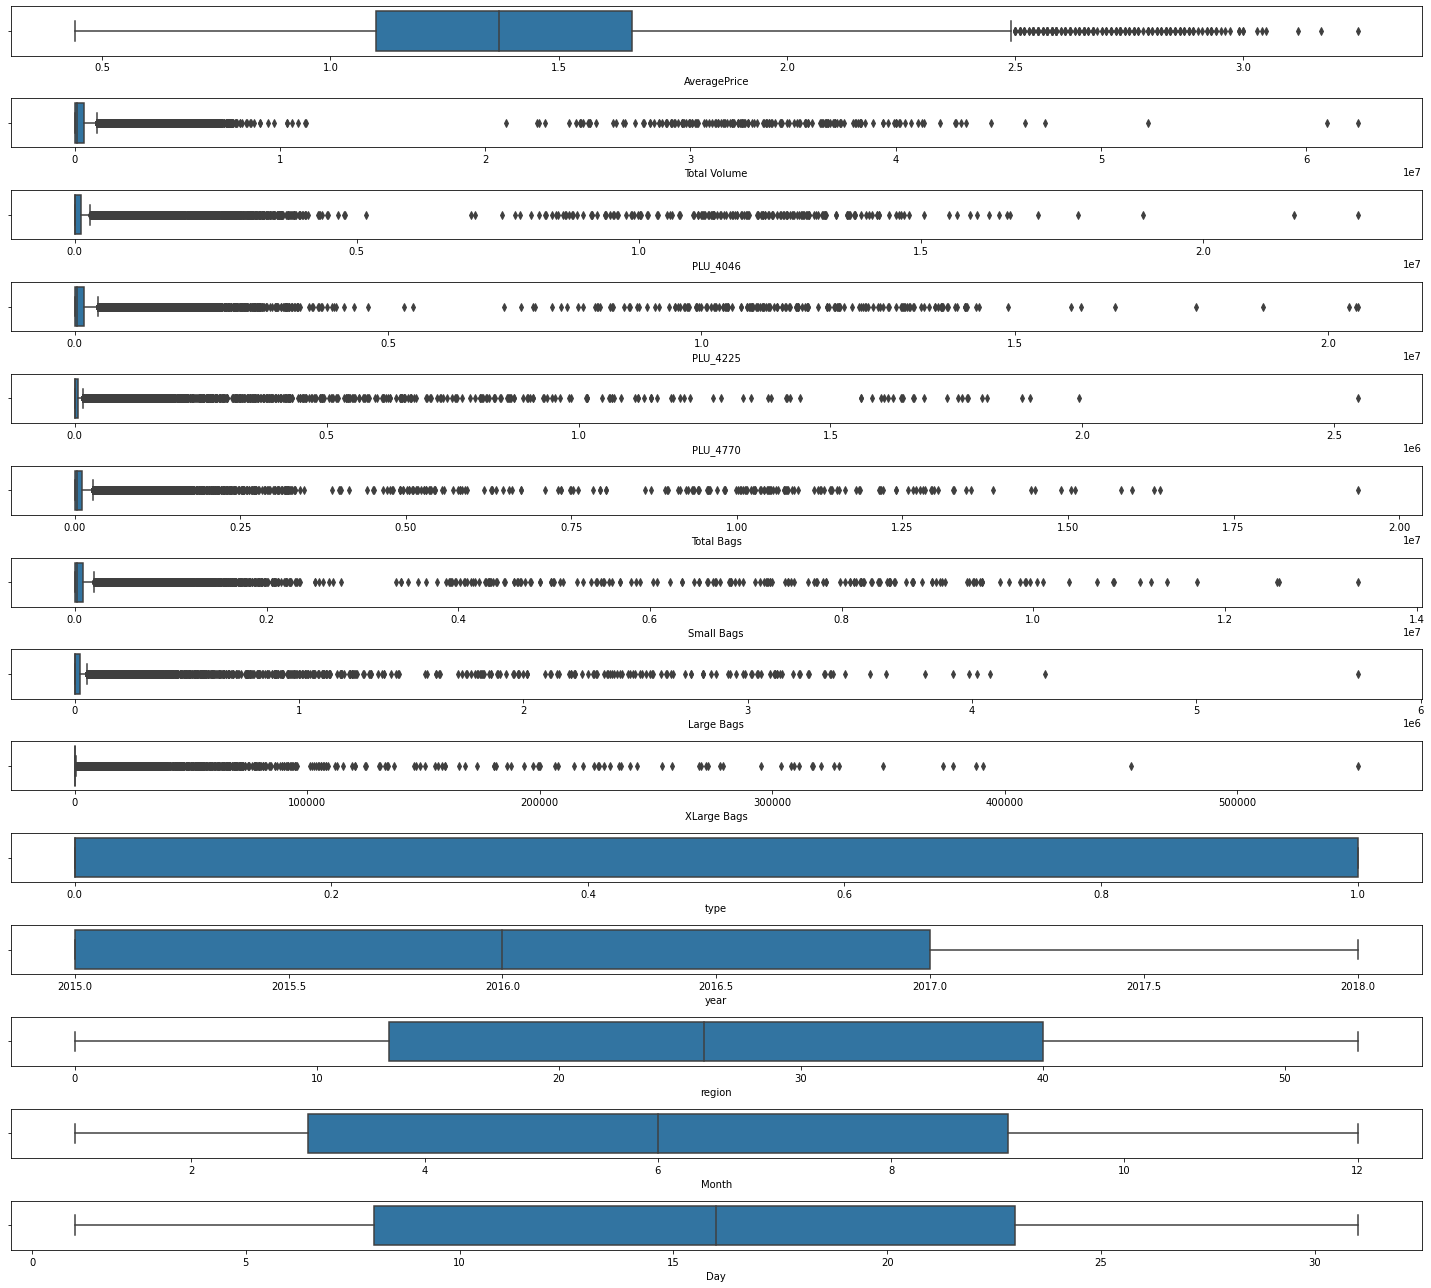

In [153]:
fig, axs = plt.subplots(14, figsize=[20,18])
plt1 = sns.boxplot(df['AveragePrice'], ax=axs[0])
plt2 = sns.boxplot(df['Total Volume'], ax = axs[1])
plt3 = sns.boxplot(df['PLU_4046'], ax = axs[2])
plt4 = sns.boxplot(df['PLU_4225'], ax=axs[3])
plt5 = sns.boxplot(df['PLU_4770'], ax = axs[4])
plt6 = sns.boxplot(df['Total Bags'], ax= axs[5])
plt7 = sns.boxplot(df['Small Bags'], ax = axs[6])
plt8 = sns.boxplot(df['Large Bags'], ax= axs[7])
plt9 = sns.boxplot(df['XLarge Bags'], ax = axs[8])
plt10 = sns.boxplot(df['type'], ax = axs[9])
plt11 = sns.boxplot(df['year'], ax = axs[10])
plt12 = sns.boxplot(df['region'], ax = axs[11])
plt13 = sns.boxplot(df['Month'], ax =axs[12])
plt14 = sns.boxplot(df['Day'], ax =axs[13])

plt.tight_layout()

Columns 'type', 'Year', 'region', 'Month', and 'Day' do not contain outliers. All other columns have outliers present.

#### Checking if skewness is present in the datset:

In [154]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

###### Skewness threshold is taken as +/-0.5. 
  Total Volume, PLU_4046,PLU_4225,PLU_4770,Total Bags, Small Bags, Large Bags, XLarge Bags. These columns has very high skewness.

#### Removing Outliers using zscore technique

In [155]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(18249, 14)

In [156]:
thershold = 3
print(np.where (z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [157]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

print ('Shape after removing the outliers is ', df_new.shape)
# Assigning the values to df_new which are less of thershold value and removing the outliers

(18249, 14)
(17651, 14)
Shape after removing the outliers is  (17651, 14)


In [158]:
# Checking percentage of data loss:

loss_per = ((18249-17651)/18249)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.276891884486821


- Dividing the dataset in Features and Vector 

In [159]:
x = df_new.drop(['AveragePrice'], axis = 1)
y = df_new['AveragePrice']

#### Removing Skewness using the power transform method

In [160]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

#### StandardScaler:

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

#### Data Preprocessing:

In [162]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

####  LinearRegression:

In [163]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [-2.80942792e-01  1.86981012e-02  2.62501338e-01  3.17413409e-02
 -2.71079140e-01  2.11668540e-01 -3.18778398e-02  1.47427977e-04
  1.86376058e-01  9.92756385e-02  1.11847071e-02  7.84959193e-02
  8.90083811e-03]
Intercept : 1.4070497697935505


In [164]:
# Predicting the new result

LR_pred = LR.predict(x_test)
LR_pred

array([1.15750837, 1.24289388, 1.12199189, ..., 1.83389538, 1.53242729,
       1.20363702])

####  DecisionTreeRegressor:

In [165]:
from sklearn.tree import DecisionTreeRegressor 

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [166]:
DT_pred = DT.predict(x_test)
DT_pred
# Predicting the new result

array([1.4 , 1.76, 1.17, ..., 2.23, 1.49, 1.14])

#### KNeighborsRegressor:

In [167]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [168]:
KNN_pred = KNN.predict(x_test)
KNN_pred
# Predicting the new result

array([1.275, 1.74 , 1.185, ..., 1.99 , 1.495, 1.235])

####  RandomForestRegressor:

In [169]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=42)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [170]:
RF_pred = RF.predict(x_test)
RF_pred
# Predicting the new result

array([1.03166999, 1.23691636, 1.17095743, ..., 1.7182269 , 1.17095743,
       1.03166999])

#### Mean Absolute Error:

In [171]:
from sklearn.metrics import mean_absolute_error

print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred),
      '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, RF_pred))

 Mean Absolute Error for LinearRegression is  0.19831649387015463 
 Mean Absolute Error for DecisionTreeRegressor is  0.12474653072783914 
 Mean Absolute Error for KNeighborsRegressor is  0.12882186349476069 
 Mean Absolute Error for RandomForestRegressor is  0.2238529288951942


We can see that the Mean Absilute error is least for DecisionTreeRegressor (0.124), so this can be considered as good model.
The Mean Absolute Error for KNeighboursRegressor is (0.126), which is almost equal to the DecisionTreeRegressor. So, let's check for Root Mean Squared Error and R2_Score to decide the best model. 

#### Root Mean Squared Error

In [172]:
from sklearn import metrics

rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, RF_pred))

print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  0.25185126178528594
Root Mean Squared Error for DecisionTreeRegressor is  0.18966171497847284
Root Mean Squared Error for KNeighborsRegressor is  0.18047672795811143
Root Mean Squared Error for RandomForestRegressor is  0.2842115057447561


- From the above observation we can see that the Root Mean Squared Error is least for KNeighborsRegressor. So, we can consider it best among others. Let's check for the R2_Score

#### R-Squred:

In [173]:
from sklearn.metrics import r2_score

print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred), '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred), '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, RF_pred))

 R2_Score for LinearRegression is  0.570600173507977 
 R2_Score for DecisionTreeRegressor is  0.7564809453901435 
 R2_Score for KNeighborsRegressor is  0.7794962296478138 
 R2_Score for RandomForestRegressor is  0.4531642320568916


- R2_Score closest to 1.0 is considered as best. From the above observations we can see that the best R2_Score is for KNeighborsRegressor (0.79)

#### Per observations we can say that the best model is KNeighborsRegressor.

### Model Saving:

In [175]:
import pickle
filename = 'Avocado.pkl'
pickle.dump(KNN, open(filename, 'wb'))